오늘은 토큰화. 단어 빈도 분석에 대하여 공부를 해보겠습니다.

참고 : TEXT MINING with R

### Chapter1. 정돈 텍스트 형식

예시 데이터

In [2]:
text <- c("Because I could not stop for Death -",
          "He kindly stopped for me -",
          "The Carriage held but just Ourselves -",
          "and Immortalit")
text

[1] "Because I could not stop for Death -"  
[2] "He kindly stopped for me -"            
[3] "The Carriage held but just Ourselves -"
[4] "and Immortalit"

다음과 같이 text라는 변수에 **c()**함수를 이용하여 데이터나 객체들을 하나로 결합시켰습니다.

In [3]:
install.packages("dplyr")
library(dplyr)

also installing the dependency 'rlang'




  There are binary versions available but the source versions are later:
      binary source needs_compilation
rlang 0.4.11  1.0.2              TRUE
dplyr  1.0.6  1.0.8              TRUE

  Binaries will be installed
package 'rlang' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hu612\AppData\Local\Temp\Rtmp4u4c3X\downloaded_packages


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



만들어두었던 text를 데이터 프레임으로 바꾸는 과정입니다.

In [4]:
text_df <- tibble(line = 1:4, text = text)
text_df

line,text
1,Because I could not stop for Death -
2,He kindly stopped for me -
3,The Carriage held but just Ourselves -
4,and Immortalit


- **tibble**<br>
tibble은 data.frame()을 사용하다가 불필요한 내용은 덜어내고 필요한 사항을 집약시킨 좀 더 직관적인 자료구조입니다.

In [5]:
install.packages("tidytext")
library(tidytext)


  There is a binary version available but the source version is later:
         binary source needs_compilation
tidytext  0.3.1  0.3.2             FALSE



installing the source package 'tidytext'



In [6]:
text_df %>%
  unnest_tokens(word, text)

line,word
1,because
1,i
1,could
1,not
1,stop
1,for
1,death
2,he
2,kindly
2,stopped


- **%>%**<br>
파이프 연산자라고 합니다. 파이프 연산자는 물길을 연결하는 파이프처럼 데이터와 데이터를 연결한다고 합니다. 이 연산자는 dplyr 패키지의 핵심 연산자입니다.

- **unnest_tokens()**<br>
데이터프레임 구조(tibble)의 데이터를 받아 처리합니다. 텍스트 데이터를 컴퓨터가 분석할 수 있도록 양화할 수 있는 단위로 나누는 함수로 토큰화라고도 합니다. 기본 단위는 word입니다. 

#### **<코드 해석>**
-> 위 코드는 앞서 만든 text_df에서 text열을 word로 토큰화한 코드입니다.

-> line3에 carriage 단어를 살펴보면 text_df에서는 Carriage였는데 토큰화를 끝낸 후 소문자로 변경됨을 확인이 됩니다. 이는 옵션인 to_lower=True가 기본 설정이기 때문입니다. 대문자에 의미가 있는 단어를 토큰화 할 때는 False로 옵션을 바꿔 사용해야 합니다.

### 1.3 Tidying the works of Jane Austen  

위 과정에서는 Jane Austen의 작품을 정리해보겠습니다.
<br>
<img src = 'http://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQpAh6vAnn9vloo_M3P4vVRQC4v5npGXHtYGGHSwvrM1yDGsdpquzuWZsRRhLLO'>
<br>
Jane Austen(제인 오스틴)은 유명한 영국의 소설가입니다. r에는 janeaustenr 패키지가 있는데 Jane Austen의 6가지 소설을 가져왔습니다. 이 패키지를 통해 실습을 해보겠습니다.

In [7]:
install.packages("janeaustenr")
library(janeaustenr)
library(dplyr)
install.packages("stringr")
library(stringr)

package 'janeaustenr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hu612\AppData\Local\Temp\Rtmp4u4c3X\downloaded_packages


Warning message:
"package 'janeaustenr' was built under R version 3.6.3"

package 'stringr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hu612\AppData\Local\Temp\Rtmp4u4c3X\downloaded_packages


Warning message:
"package 'stringr' was built under R version 3.6.3"

In [9]:
!pip search -c conda-forge r

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: 예상하지 못한 기호(symbol)입니다.
1: !pip search
         ^


In [10]:
original_books <- austen_books() %>%
  group_by(book) %>%
  # 새 컬럼
  mutate(linenumber = row_number(),
         chapter = cumsum(str_detect(text,
                                     regex("^chapter [\\divxlc]",
                                           ignore_case = TRUE)))) %>%
  ungroup()

original_books

text,book,linenumber,chapter
SENSE AND SENSIBILITY,Sense & Sensibility,1,0
,Sense & Sensibility,2,0
by Jane Austen,Sense & Sensibility,3,0
,Sense & Sensibility,4,0
(1811),Sense & Sensibility,5,0
,Sense & Sensibility,6,0
,Sense & Sensibility,7,0
,Sense & Sensibility,8,0
,Sense & Sensibility,9,0
CHAPTER 1,Sense & Sensibility,10,1


- **mutate()**<br>
새 컬럼을 생성하는 함수입니다.
- **row_number()**<br>
고유한 데이터를 순서대로 반환하는 함수입니다. 쉽게 index라고 생각하시면 됩니다.
- **cumsum()**<br>
누적합을 나타냅니다.
- **str_detect**<br>
특정 문자열을 찾아줍니다.
- **regex("^chapter [\\divxlc]",ignore_case = TRUE)**<br>
regex는 regular expression의 약자로 정규표현식을 의미합니다. ^는 문자열의 시작을 의미하고 divxic는 숫자가 오거나 로마자로 되어있는 애들만 추출한다는 의미입니다. 이때 ignore_case는 대/소문자를 어떻게 처리하겠냐는 의미로 TRUE는 무시하겠다는 의미입니다. 



#### **<코드 해석>**
-> janeausternr 패키지 안에 있는 austen_books()를 book열울 기준으로 group by 합니다.<br>

-> 새로운 열로 linenumber열과 chapter열을 만듭니다.linenumber열은 1부터 행의 순서를 return해줍니다.chapter열은 누적합을 나타내는데 text열에서 정규표현식으로 대소문자에 상관없이 Chapter #로 시작하는 로마자나 숫자를 찾겠다는 의미입니다.

이를 아까 쓴 함수인 unnest_tokens 함수를 이용하여 토큰화시켜줍니다.

In [11]:
library(tidytext)
tidy_books <- original_books %>%
  unnest_tokens(word, text)

tidy_books

book,linenumber,chapter,word
Sense & Sensibility,1,0,sense
Sense & Sensibility,1,0,and
Sense & Sensibility,1,0,sensibility
Sense & Sensibility,3,0,by
Sense & Sensibility,3,0,jane
Sense & Sensibility,3,0,austen
Sense & Sensibility,5,0,1811
Sense & Sensibility,10,1,chapter
Sense & Sensibility,10,1,1
Sense & Sensibility,13,1,the


#### 불용어

데이터를 처리할 때 필요없는 단어가 있습니다. 이를 불용어라고 하는데 구체적으로 불용어는 분석에 유용하지 않는 단어를 의미하며 영어에서는 'the', of', 'to' 등이 있습니다. 이를 **anti_join()**을 이용하여 제거해보는 작업을 해보겠습니다. 

In [12]:
# 불용어 목록
#stop_words

In [13]:
data(stop_words)

In [14]:
tidy_books <- tidy_books %>%
  anti_join(stop_words)

Joining, by = "word"


- **anti_join()**
: x와 y중 맞지 않는 row를 출력하는 join입니다.


어떤 단어들이 높은 빈도로 쓰였는지 즉, 제인 오스틴이 습관적으로 쓰는 단어나 책에서 많이 나온 단어는 어떤게 있는지 확인해보겠습니다.

In [15]:
tidy_books %>%
  count(word, sort = TRUE) 

word,n
miss,1855
time,1337
fanny,862
dear,822
lady,817
sir,806
day,797
emma,787
sister,727
house,699


가장 많이 쓰이는 단어로는 miss가 있습니다. 많이 쓰이는 단어(600번 이상)를 기준으로 시각화를 해보겠습니다.


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'



$y
NULL

attr(,"class")
[1] "labels"

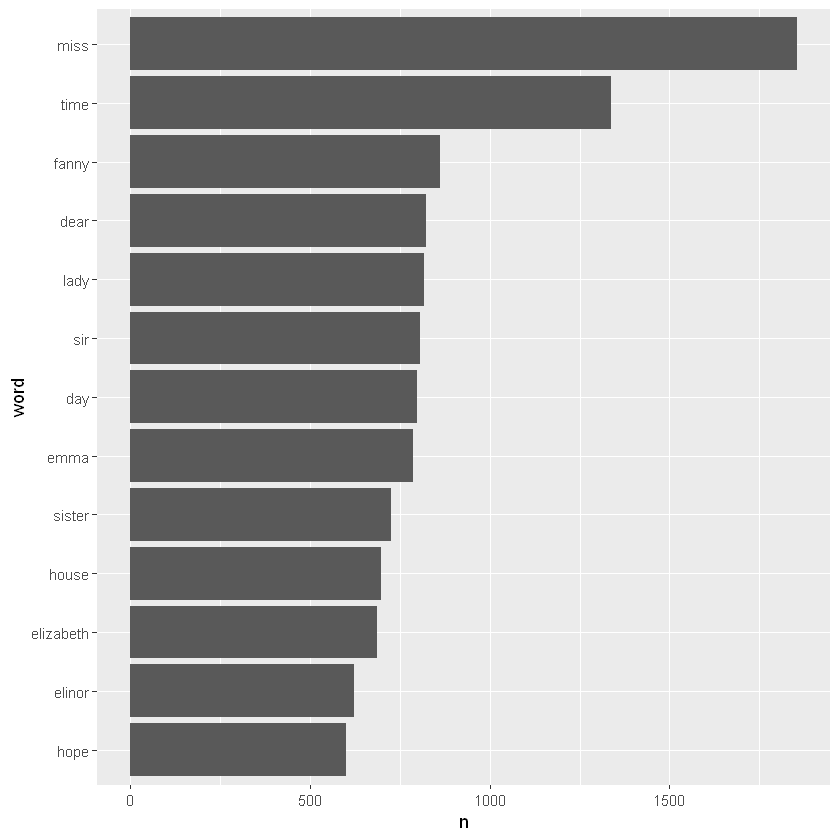

In [17]:
install.packages("ggplot2")
library(ggplot2)
tidy_books %>%
  count(word, sort = TRUE) %>%
  filter(n > 600) %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(n, word)) +
  geom_col()
  labs(y = NULL)

- **aes(aesthetic)**<br>
그래프의 미적 부분을 x,y축, 컬러 등 모습을 지정할 수 있습니다. 위 그래프에서는 갯수를 x축으로, 단어를 y축으로 두었습니다.

### 1.5 Word Frequencies

위 단원에서는 단어 빈도에 대하여 살펴볼 것입니다.

먼저 **gutenbergr** 패키지에 대하여 설명하자면 gutenbergr(구텐베르크) 프로젝트 모음집 중 공공 저작물에 해당하는 텍스트에 접근할 수 있게 합니다. 위 패키지에서 ID별로 하나 이상의 작품을 다운로드하는 gutenberg_download를 주로 써서 데이터를 가져옵니다.

In [19]:
install.packages("gutenbergr")
library(gutenbergr)


  There is a binary version available but the source version is later:
           binary source needs_compilation
gutenbergr  0.2.0  0.2.1             FALSE



installing the source package 'gutenbergr'



우리는 제인 오스틴 소설의 단어 빈도와 다른 작가의 단어 빈도를 분석해볼 것입니다. 첫번째 작가는 H.G.Wells(웰스)로 공상 과학 소설과 판타지 소설을 주로 썼습니다.

In [20]:
hgwells <- gutenberg_download(c(35, 36, 5230, 159))

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest
Using mirror http://aleph.gutenberg.org


In [21]:
hgwells

gutenberg_id,text
35,The Time Machine
35,
35,An Invention
35,
35,by H. G. Wells
35,
35,
35,CONTENTS
35,
35,I Introduction


위 데이터를 이용하여 앞서 했던 unnest_tokens와 anti_join을 이용하여 데이터를 정돈해줍니다.

In [22]:
tidy_hgwells <- hgwells %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words)

Joining, by = "word"


In [23]:
tidy_hgwells %>%
  count(word, sort = TRUE)

word,n
time,461
people,302
door,260
heard,249
black,232
stood,229
white,224
hand,218
kemp,213
eyes,210


공상 과학 소설과 판타지 소설을 주로 쓴 작가의 작품의 단어 빈도를 보니 제인 오스틴의 단어 빈도와 다른 모양을 띄고 있는 것을 확인할 수 있습니다.


두번째 작가는 Bronte(브론테) 자매입니다. 브론테 자매는 제인 오스틴과 비슷한 시대를 살았지만다른 문체로 글을 썼다고 합니다. 

In [24]:
bronte <- gutenberg_download(c(1260, 768, 969, 9182, 767))
tidy_bronte <- bronte %>%
  unnest_tokens(word, text) %>%
  anti_join(stop_words)

Joining, by = "word"


In [25]:
tidy_bronte %>%
  count(word, sort = TRUE)

word,n
time,1065
miss,854
day,825
hand,767
eyes,714
don’t,666
night,648
heart,638
looked,601
door,591


세 작가에 대하여 단어의 빈도를 구해보았으면 이를 하나의 데이터 프레임으로 묶어볼 것입니다.

In [26]:
install.packages("tidyr")
library(tidyr)


  There is a binary version available but the source version is later:
      binary source needs_compilation
tidyr  1.1.3  1.2.0              TRUE

  Binaries will be installed
package 'tidyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hu612\AppData\Local\Temp\Rtmp4u4c3X\downloaded_packages


Warning message:
"package 'tidyr' was built under R version 3.6.3"

In [27]:
library(tidyr)
frequency <- bind_rows(mutate(tidy_bronte, author = "Brontë Sisters"),
                       mutate(tidy_hgwells, author = "H.G. Wells"), 
                       mutate(tidy_books, author = "Jane Austen")) %>% 
  mutate(word = str_extract(word, "[a-z']+")) %>%
  count(author, word) %>%
  group_by(author) %>%
  mutate(proportion = n / sum(n)) %>% 
  select(-n) %>% 
  pivot_wider(names_from = author, values_from = proportion) %>%
  pivot_longer(`Brontë Sisters`:`H.G. Wells`,
               names_to = "author", values_to = "proportion")

frequency

word,Jane Austen,author,proportion
a,9.190796e-06,Bronte Sisters,5.869785e-05
a,9.190796e-06,H.G. Wells,1.471844e-05
aback,NA,Bronte Sisters,3.913190e-06
aback,NA,H.G. Wells,1.471844e-05
abaht,NA,Bronte Sisters,3.913190e-06
abaht,NA,H.G. Wells,NA
abandon,NA,Bronte Sisters,3.130552e-05
abandon,NA,H.G. Wells,1.471844e-05
abandoned,4.595398e-06,Bronte Sisters,9.000337e-05
abandoned,4.595398e-06,H.G. Wells,1.766212e-04


- **bind_rows()**<br>
다수의 데이터 프레임을 행 기준으로 합치는 함수입니다.
- **[a-z]+**<br>
a부터 z까지 한 글자 이상 끄집어냅니다.
- **pivot_longer**<br>
데이터를 long format으로 변경합니다. 행 수를 늘리고 열 수를 줄입니다.

#### <코드 해석>
-> 앞에서 구한 세 작가의 깔끔한 데이터를 연결할 건데 auther만 표시해둔 상태로 행으로 연결합니다. <br>
-> word열 생성 후 문자열을 채워주고, auther의 word를 카운팅합니다. <br>
-> 전체 단어에서 얼만큼의 비율을 차지하는지 proportion열을 이용하여 채워주고 n값은 열에서 삭제해줍니다.<br>
-> 'Bronte Sisters'와 'H.G.Wells' 가 재구조화된 칼럼은 author이고 재구조화된 수치는 proportion입니다.

In [31]:
#install.packages("scales")
library(scales)
library(ggplot2)

# expect a warning about rows with missing values being removed
ggplot2(frequency, aes(x = proportion, y = `Jane Austen`, 
                      color = abs(`Jane Austen` - proportion))) +
  geom_abline(color = "gray40", lty = 2) +
  geom_jitter(alpha = 0.1, size = 2.5, width = 0.3, height = 0.3) +
  geom_text(aes(label = word), check_overlap = TRUE, vjust = 1.5) +
  scale_x_log10(labels = percent_format()) +
  scale_y_log10(labels = percent_format()) +
  scale_color_gradient(limits = c(0, 0.001), 
                       low = "darkslategray4", high = "gray75") +
  facet_wrap(~author, ncol = 2) +
  theme(legend.position="none") +
  labs(y = "Jane Austen", x = NULL)

Warning message:
"package 'scales' was built under R version 3.6.3"

ERROR: Error in value[[3L]](cond): Package 'scales' version 1.0.0 cannot be unloaded:
 Error in unloadNamespace(package) : namespace 'scales' is imported by 'ggplot2' so cannot be unloaded



- R studio에서 코드를 실행시키면 문제 없이 돌아가는데 주피터에서는 버전이 안맞아서 안 돌아가는 경향을 보입니다.
- 위 내용의 결과에 대하여 https://blog.naver.com/soodagnu 에 업로드해두겠습니다.

### [Reference]

[1] https://www.tidytextmining.com/tidytext.html<br>
[2] https://hoon427.tistory.com/83<br>
[3] https://bookdown.org/ahn_media/bookdown-demo/browse.html<br>